# Исследование объявлений о продаже квартир

## Задание_1

* По каждой продаваемой квартире у вас есть два вида данных. Первые — вносили сами пользователи при публикации объявлений, вторые — получены на основе картографических данных: расстояния до центра, аэропорта, ближайшего парка и водоёма.

### Шаг 1. Начните исследование
* Откройте файл с данными и изучите общую информацию
* Путь к файлу: /datasets/real_estate_data.csv

____

### Шаг 2. Подготовьте данные
* определите и заполните пропущенные значения;
* приведите данные к нужным типам.

#### Посчитайте и добавьте в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж, на котором расположена квартира; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

#### Поясните:
* какие пропущенные значения обнаружены;
* в чём возможные причины возникновения пропусков;
* в каких столбцах потребовалось изменить тип данных и почему;
* по какому принципу заполнены пропуски.
______
______

## Задание_2. Опишите выводы

### Шаг 1. Проведите исследовательский анализ данных и ответьте на вопросы:

* Каковы типичные параметры продаваемых квартир (например, площадь, цена)? 
* Укажите наиболее важные характеристики и постройте графики.
* Сколько обычно длится процесс продажи?
 

#### Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

#### Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите:
    1. зависит ли цена квадратного метра от числа комнат
    2. этажа (первого или последнего)
    3. удалённости от центра
    4. даты размещения: дня недели, месяца и года.
    


#### Что можно сказать о цене квадратного метра в пригородах?
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.


#### Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. 
* Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.


#### Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
* Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

____

### Шаг 2. Напишите общий вывод

____

### Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

-----
-----


# Задание_1

## Шаг 1. Начните исследование

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
#настройки отображения столбцов и строк в датафрейме
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 10000)
#отключаю предупреждения
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pymystem3 import Mystem
from collections import Counter

In [2]:
#Добавляем правильный разделитель
df = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')

In [3]:
df.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,108.0,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,40.4,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,56.0,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,159.0,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,100.0,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


____
____

## Шаг 2. Подготовьте данные

### Посмотрим формат данных в столбцах

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

In [5]:
df.shape

(23699, 24)

### Найдем долю пропущенных значений по столбцам от общего количество значений в столбце

In [4]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

is_apartment            0.882906
building_series_id      0.725009
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
area                    0.000000
open_plan               0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
last_price              0.000000
total_images            0.000000
studio                  0.000000
dtype: float64

### Для упрощения агрегаций, заменю True и False на 0 и 1.

In [5]:
df['is_apartment'] = df['is_apartment'].map({True: 1, False: 0})
df['studio'] = df['studio'].map({True: 1, False: 0})
df['open_plan'] = df['open_plan'].map({True: 1, False: 0})

-----

## Замена NaN в is_apartment
* В соответствии с официальной позицией, в датасете все объекты - жилая недвижимость, включая апартаменты.
* Причина NaN в апартаментах - это не указанный False

In [7]:
df.is_apartment = df.is_apartment.fillna(0)

In [8]:
df.is_apartment.value_counts()

0       23649
True       50
Name: is_apartment, dtype: int64

### Поменяем тип на int, float избыточен для хранения 1 и 0

In [8]:
df.is_apartment = df.is_apartment.astype('int16')

--------

## Замена NaN в building_series_id и чистка данных

* Данные в столбце building_series_id категориальные, но есть ошибки и пропущенные значения. Что возможно, приведем в отдельный вид с помощью трансформации данных и лемматизации. 
* Сохраним номера серий домов, тк внутри серий у похожих квартир одинаковые параметры, __это поможет нам восстановить данные в других столбцах более точно.__

In [11]:
df.building_series_id.unique()

array(['1564812', nan, 'Сталинский', '1568627.0', '1564812.0',
       '1568643.0', '1564806.0', '1564796.0', '1569038.0', '1564801.0',
       '1564801', '1569071.0', '1564792', 'Панельный', '1569071',
       '1564792.0', '1569054.0', '1569033.0', '504', '1569066',
       '600.11 серия', '1568690.0', '1564806', '712041.0', 'Брежневка',
       '1568627', '1568663.0', 'Старый фонд с КР', '1568734.0',
       '137 серия', 'сталинский', '712041', '1569066.0', 'Хрущевка',
       '600', '1569033', '1568675.0', 'Кирпичный монолит', '1564796',
       'Индивидуальный', 'старый фонд', 'кирп.монолит', 'Кирпичный',
       '1568663', 'Старый фонд', '1568658', 'Кирп.Монолит', '1569075.0',
       '1568658.0', '7', '1569038', '1569054', '1569061.0',
       '121 (Гатчинская)', '1568675', '602 серия', '1 ЛГ - 600.11', '137',
       '606 серия', '1569088.0', '1569048.0', '100', '1568643',
       '1569041.0', '121', '1569079.0', '1569041', 'хрущевка', 'Блочный',
       'старый фонд + капремонт', 'монолит', 

In [9]:
# изначальное количество уникальных групп в сериях домов
df.building_series_id.nunique()

121

### Удалим добавки к сериям, чтобы отнести записи к бОльшей группе с правильным написанием серии

In [10]:
df.building_series_id = df.building_series_id.str.replace(' серия','')
df.building_series_id = df.building_series_id.str.replace('1 ЛГ - ','')
df.building_series_id = df.building_series_id.str.replace('1ЛГ-','')

### Избавимся от типа str(float) и переведем числовые значения в int, чтобы объединить данные и убрать десятичную часть

In [11]:
def float_to_int(row):
    temp=0
    try:
        temp = int(float(row))
    except:
        temp = row
    return temp

----------

## <span style="color:orange">Комментарий от наставника</span>

Всё-таки не очень мне нравится эта функция. Ты допускаешь, что при преобразовани внутри кода, у тебя упадёт с ошибкой. Почему не используешь преобразования типов со встроенными методами pandas вместо такой функции?

---------
#### В сериях домов содержаться смешанные данные - строковые и числовые, при этом часть числовых данных представлена как в str(float), так и в str(int). Чтобы объединить как можно больше групп, и посчитать более точные статистики, я использую (там где это возможно) перевод в int. Но от серий строкового типа (1-ЛГ и тд) все равно это не спасет, поэтому укрупняю группы которые возможно, с помощью конструкции try except.
#### Добавил пример на скриншоте: http://joxi.ru/krDXLLXUKqdkgr

In [12]:
df['building_series_id'] = df['building_series_id'].map(float_to_int)

In [13]:
unique_type_of_houses = list(df.building_series_id.unique())

In [14]:
# проверим, получилось ли укрупнить группы
df.building_series_id.nunique()

88

----------

## <span style="color:orange">Комментарий от наставника</span>

Обрати внимание, ты делаешь преобразование в Int, но твой столбец всё-равно на выходе строковый, пониаешь почему так получается? Что ты хотел сделать?

---------
#### Понимаю, пояснил этот момент вверху. Хочу укрупнить группы, чтобы считать более точные статистики для замены NaN, но в столбце даные смешанные типы данных - str(int) / str(float). Есть только один вариант это исправить с помощью try except

In [15]:
# Код наставника
df['building_series_id'].describe()

count        6517
unique         88
top       1564812
freq         3805
Name: building_series_id, dtype: int64

### Лемматизируем стринговые типы домов

In [16]:
m = Mystem()
lemmas = m.lemmatize(str(unique_type_of_houses))
print(Counter(lemmas))

Counter({', ': 26, "', '": 26, ", '": 17, ' ': 17, "', ": 16, '-': 13, 'старый': 6, 'фонд': 6, 'монолит': 5, '121': 5, '1': 5, '.': 4, 'гатчинский': 4, 'кирпичный': 3, 'индивидуальный': 3, 'сталинский': 2, 'панельный': 2, '600': 2, 'брежневка': 2, 'с': 2, 'КР': 2, 'хрущевка': 2, 'кирпа': 2, 'блочный': 2, '(': 2, ")', '": 2, '528': 2, 'кп': 2, 'корабль': 2, 'г': 2, '[': 1, '1564812': 1, 'nan': 1, '1568627': 1, '1568643': 1, '1564806': 1, '1564796': 1, '1569038': 1, '1564801': 1, '1569071': 1, '1564792': 1, '1569054': 1, '1569033': 1, '504': 1, '1569066': 1, '1568690': 1, '712041': 1, '1568663': 1, '1568734': 1, '137': 1, '1568675': 1, '1568658': 1, '1569075': 1, '7': 1, '1569061': 1, ' (': 1, ")', ": 1, '602': 1, '606': 1, '1569088': 1, '1569048': 1, '100': 1, '1569041': 1, '1569079': 1, ' + ': 1, 'капремонт': 1, '502': 1, 'II': 1, '18': 1, '/': 1, '9': 1, '13': 1, '1568653': 1, ' - ': 1, '2': 1, 'монола': 1, '1568700': 1, '6066М': 1, '335': 1, '97': 1, 'бесшовный': 1, 'технология': 1, 

In [17]:
df['building_series_id'] = df.building_series_id.apply(
            lambda x: 
            'Индивидуальный проект' if 'индивид' in m.lemmatize(str(x)) or 'индивидуальный' in m.lemmatize(str(x))
            else 'Кирпичный' if 'кирпа' in m.lemmatize(str(x)) or 'кирпичный' in m.lemmatize(str(x))
            else 'Сталинский' if 'сталинский' in m.lemmatize(str(x))
            else 'Хрущевка' if 'хрущевка' in m.lemmatize(str(x))
            else 'Гатчинская' if 'гатчинский' in m.lemmatize(str(x))
            else 'Корабль' if 'корабль' in m.lemmatize(str(x))
            else 'Панельный' if 'панельный' in m.lemmatize(str(x))
            else 'Блочный' if 'блочный' in m.lemmatize(str(x))
            else 'Брежневский' if 'брежневка' in m.lemmatize(str(x))
            else 'Старый фонд с ремонтом' if 'капремонт' in m.lemmatize(str(x)) or ('кр' in m.lemmatize(str(x))
                                                                               and 'без' not in m.lemmatize(str(x)))                                                    
            else 'Старый фонд без ремонта' if 'старый' in m.lemmatize(str(x))
            else 'Монолитный' if 'монолит' in m.lemmatize(str(x))                                                                        
            else x
                                                      )

In [18]:
#посмотрим, не пропустили ли мы что-то еще
df.building_series_id.unique()

array([1564812, nan, 'Сталинский', 1568627, 1568643, 1564806, 1564796,
       1569038, 1564801, 1569071, 1564792, 'Панельный', 1569054, 1569033,
       504, 1569066, 600, 1568690, 712041, 'Брежневский', 1568663,
       'Старый фонд без ремонта', 1568734, 137, 'Хрущевка', 1568675,
       'Кирпичный', 'Индивидуальный проект', 1568658, 1569075, 7, 1569061,
       'Гатчинская', 602, 606, 1569088, 1569048, 100, 1569041, 121,
       1569079, 'Блочный', 'Старый фонд с ремонтом', 'Монолитный', 502,
       'II-18/9', 13, 1568653, '1-528 КП - 2', 'Корабль', 1568700,
       '6066М', '1-335-1', '1-528-КП-97', 'Бесшовная технология', 1568708,
       'ИТП', 1568709, 663278, 14, 'ОД-6', 15, 'Г-24', '504Д', 12, 'Г-2И',
       '1-ЛГ-600-I', 16], dtype=object)

### Нам удалось снизить количество категорий почти в 2 раза, это должно помочь нам при замене пропущенных значений в других признаках

In [19]:
df.building_series_id.nunique()

67

----------

## <span style="color:red">Комментарий от наставника</span>

Ну ты и заморочился - на первый взгляд это излишне

---------

### Заменим NaN в building_series_id на 'Серия неизвестна'

In [20]:
df.building_series_id = df.building_series_id.fillna('Серия неизвестна')

### Проверим, не осталось ли еще что-то

In [21]:
df.building_series_id.isna().sum()

0

-------

## Замена NaN в floors_total

### Простыми методами floors_total возможно восстановить исходя из серии дома
* Посмотрим сколько NaN значений и какие у них серии

In [22]:
df.query('floors_total == "nan"').groupby('building_series_id').count().iloc[:,1]

building_series_id
1564812              6
Серия неизвестна    80
Name: last_price, dtype: int64

### Отлично, 6 значений можно восстановить по серии дома
* посмотрим как распределяются данные по высоте этажей в этой серии дома

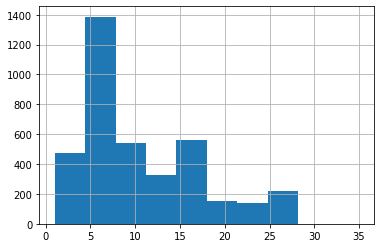

In [24]:
df[df.building_series_id == 1564812]['floors_total'].hist()

### Хм, даже внутри одной серии домов количество этажей всего сильно отличается, для замены буду 25 этажей, тк это подходит для всех 6 NaN значений.
### Т.к. учитывая их значения в фиче floor (этаж объекта), мода и медиана внутри серии не подходит:

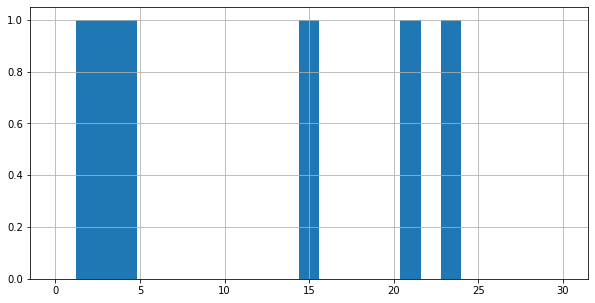

In [25]:
# Посмотрим на распределение значения по этой серии в floor, чтобы принять решение - 
# можем ли мы заменить floor_total на медиану/моду
df\
      .query('floors_total == "nan" & building_series_id == 1564812')['floor']\
      .hist(range=(0,30),bins=25, figsize=(10,5), grid=True)

In [27]:
# не подходит для всех NaN в этой серии, меньше чем этаж квартиры

df[df.building_series_id == 1564812]['floors_total'].mode()

0    5.0
dtype: float64

In [28]:
# не подходит для всех NaN в этой серии, меньше чем этаж квартиры

df[df.building_series_id == 1564812]['floors_total'].median()

8.0

### Произведем замену floors_total в серии 1564812 на 25 этажей (> значения floor по всем записям)

In [26]:
df.loc[(df['floors_total'].isnull()) & (df['building_series_id']==1564812), 'floors_total'] = 25

### Проверим что все прошло хорошо

In [27]:
df[df.building_series_id == 1564812]['floors_total'].isna().sum()

0

### NaN значения в floors_total остались только по неизвестной серии. Посмотрим какой разброс значений по неизвестной серии домов. Возможно ли восстановить значение (медиана/среднее) floors_total или это будет нецелесообразно.

In [32]:
df.loc[df['floors_total'].isnull(),'building_series_id'].value_counts()

Серия неизвестна    80
Name: building_series_id, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01dcaeb860>]],
      dtype=object)

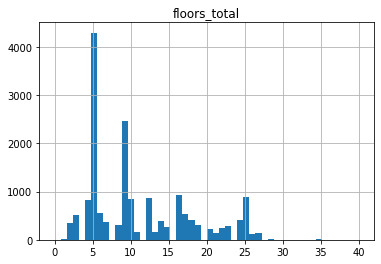

In [33]:
df.query('building_series_id == "Серия неизвестна"').hist('floors_total', grid=True, bins=50, range=(0,40))

### У гистограммы несколько пиков, и распределение не однородно. Похоже, что лучше будет удалить эти 80 значений (либо отметить числом индикатором 9999999)
* При этом в этой части df где пропущено floors_total, мы не знаем серию, количество этажей и не сможем восстановить высоту потолков (на основе серии)

### Удалим nan в группе неизвестной серии дома

In [29]:
df = df.query('floors_total != "nan"')

### Проверим что не осталось NaN значений в floors_total

In [30]:
df['floors_total'].isnull().sum()

0

In [36]:
#распечатаем уникальные значения
df.floors_total.unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

----------

## <span style="color:red">Комментарий от наставника</span>

Обратил внимание, что у тебя ручной режим замены для __floors_total__ - можно попробовать заполнять пропуски сгруппировав по типу дома.

---------
#### Согласен, у нас неизвестны floors_total в двух группах по известной серии и неизвестной серии. Выше построил гистограмму floors_total внутри известной серии дома, оказалось что у такой серии домов может быть разная этажность. Поэтому взял значение для замены, которое не противоречит всем 6 наблюдениям. floors_total >= floor (максимальное количество этажей не должно быть меньше этажа объекта)

### Количество этажей представлены в типе float64, это избыточный тип для целых чисел. Переведем в int

In [31]:
df.floors_total = df.floors_total.astype('int16')

----------

## <span style="color:red">Комментарий от наставника</span>

Возможно. Тебе будет полезна эта ссылка :) - https://www.kaggle.com/arjanso/reducing-dataframe-memory-size-by-65

---------
#### Понял, спасибо!

------

## Замена NaN в locality_name
* Заменим на 'Локация неизвестна'

In [33]:
df['locality_name'] = df['locality_name'].fillna('Локация неизвестна')

### Посмотрим уникальные значения locality_name, чтобы проверить не нужно ли нам "причесать" данные, укрупнив группы.
* Видим, что отдельно идет СПб, города вокруг СПб и 
    [деревня, село, поселок, посёлок, поселок городского типа, посёлок городского типа, городской поселок, городской посёлок, коттеджный
    поселок, коттеджный посёлок].
* Скорее всего, для дальнейшей работы полезно будет категоризировать тип населенного пункта.
* Плюс к этому, __некоторые написания нуждаются в приведении к единой форме:__
    1. городской поселок и поселок городского типа
    2. поселок через ё и е

In [39]:
df.locality_name.value_counts().sort_values(ascending=False).head(10)

Санкт-Петербург      15656
посёлок Мурино         520
посёлок Шушары         439
Всеволожск             398
Пушкин                 369
Колпино                338
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

### Заменим ё на е

In [34]:
df.locality_name = df.locality_name.str.replace('ё','е')

----------

## <span style="color:red">Комментарий от наставника</span>

А зачем? :)

---------
#### Это было излишне, добавил вариант написания поселка в apply

----------

## <span style="color:orange">Комментарий от наставника</span>

Видимо не было излишне - это я сам не увидел, что посёлок из через е и через ё пишется.

---------

### Выделим тип населенного пункта
* Порядок обработки важен, чтобы не писать доп условия. Вначале обрабатываем ПГТ, а потом поселок, тк обе строки включают в себя 'поселок'
* СПб выделим в отдельную категорию, тк цены на недвижимость там должны значительно отличаться от городов спутников

In [35]:
df['type_place'] = df.locality_name.apply(
            lambda x:'Деревня' if 'деревня' in str(x)
            else 'ПГТ' if 'городской' in str(x) or 'городского' in str(x)
            else 'СПб' if 'Санкт-Петербург' in str(x)
            else 'Поселок' if 'поселок' in str(x) or 'посёлок' in str(x)
            else 'Село' if 'село' in str(x)
            else 'СНТ' if 'товарищество' in str(x)
            else 'КП' if 'коттеджный' in str(x)
            else 'Локация неизвестна' if 'Локация неизвестна' in str(x)
            else 'Город'
                                        )

In [36]:
df.type_place.unique()

array(['СПб', 'Поселок', 'ПГТ', 'Город', 'Деревня', 'СНТ', 'Село',
       'Локация неизвестна'], dtype=object)

------

## Замена NaN в ceiling_height
* Как правило высота потолков зависит от типа дома(если не проводилось модификаций внутри квартиры)
* Основываясь на этом будем проводить замену

In [37]:
#Количество пропущенных значений в ceiling_height
df.ceiling_height.isna().sum()

9119

### Создадим отдельный датафрейм c данными по высоте потолка по каждой серии
* где посчитаем для каждой серии дома min, max, median, стандартное отклонение и количество объектов в выборке

In [38]:
df_ceiling_height = df[df['ceiling_height'].isnull()==False].groupby('building_series_id')\
    .agg({'ceiling_height':['min','max','median','mean','std','count']})

### Наибольший разброс значений получается в группе по неизвестной серии, что неудивительно, туда могли войти квартиры из многих серий


In [39]:
#отсортируем по стандартному отклонению, чтобы увидеть где наиболее большой разброс в данных высоты потолка
df_ceiling_height.columns = ['ceiling_min','ceiling_max','ceiling_median','ceiling_mean','ceiling_std','object_count']
df_ceiling_height.sort_values('ceiling_std', ascending=False)

,ceiling_min,ceiling_max,ceiling_median,ceiling_mean,ceiling_std,object_count
building_series_id,,,,,,
1569038,2.50,25.00,2.500,2.875075,2.745320,67
Серия неизвестна,1.20,100.00,2.650,2.779076,1.466698,9193
1564812,2.00,32.00,2.750,2.864858,0.903087,3267
Старый фонд с ремонтом,2.80,3.65,3.500,3.316667,0.453689,3
Старый фонд без ремонта,2.70,3.52,3.200,3.155000,0.376076,4
1568653,2.50,3.50,2.500,2.661538,0.334884,13
Индивидуальный проект,2.53,3.20,2.800,2.839091,0.212389,11
1569075,2.50,3.00,2.875,2.818750,0.206912,8
712041,2.65,3.20,2.700,2.788571,0.188187,7


### Видно что у нас есть некорректные значения в минимумах и максимумах.

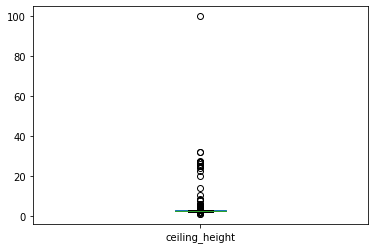

In [40]:
df['ceiling_height'].plot(kind='box')

### Заменим NaN значения ceiling_height на медианное по серии

In [41]:
df['ceiling_height']= df.groupby('building_series_id')['ceiling_height'].\
    transform(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### После замены осталось 34 значения, у которых в группе все высоты потолков равны NaN
* Такие значения мы заменим на медиану высоты потолков по всему датафрейму (не слишком точно, но что делать)

In [42]:
#Осталось NaN после замены
df['ceiling_height'].isna().sum()

34

In [43]:
# Медиана высоты потолка по всему датафрейму
df['ceiling_height'].median()

2.65

In [44]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

----------

## <span style="color:orange">Комментарий от наставника</span>

Я обратил внимание, что где-то ты используешь синтаксис обращения к столбцам через точку - __.сolumn__, где-то указываешь на столбец в квадратных скобках __['col']__ - лучше везде делать единообразно, я, например, всегда использую скобки.

---------


In [45]:
#Проверим что NaN больше нет
df['ceiling_height'].isna().sum()

0

### Теперь пройдемся и заменим некоторые некорректные значения ceiling_height
* Создадим словарь(вложенный), в котором ключи это серии, а значения это медиана по высоте потолков в серии.
* Пройдемся по датафрейму и сравним все значения высоты потолков с медианным, при сильных отличиях заменим на медиану

In [46]:
#Создадим словарь(вложенный), в котором ключ это серия, а значения это медиана по высоте потолков в серии.
dict_with_median_height = df[df['ceiling_height'].isnull()==False].groupby('building_series_id')\
    .agg({'ceiling_height':'median'})

dict_with_median_height.columns = ['median']

dict_with_median_height = dict_with_median_height.to_dict()

### Как будем искать некорректные значения и на что заменять
* В качестве минимального значения возьмем отсечку 2.2 метра, а в качестве максимального 2*медиану внутри группы(объединенные квартиры на 2х этажах)
* При выходе за эти пределы заменим значение на медианное внутри группы

In [47]:
df['ceiling_height'] = df.apply(
                lambda x: dict_with_median_height['median'][x.building_series_id] if x.ceiling_height < 2.2
                else dict_with_median_height['median'][x.building_series_id] 
                                if x.ceiling_height > dict_with_median_height['median'][x.building_series_id]*2
                else x.ceiling_height, axis=1)

-----

## Замена NaN в balcony


### Возможно в загородной недвижимости нет балконов по известным данным, проверим это
* Тогда мы сможем заменить NaN на 0 в загородной недвижимости

In [48]:
df.pivot_table(index='type_place', columns='balcony', values='floor', aggfunc='count')

balcony,0.0,1.0,2.0,3.0,4.0,5.0
type_place,,,,,,
Город,635.0,830.0,581.0,23.0,40.0,51.0
Деревня,143.0,176.0,189.0,2.0,5.0,10.0
Локация неизвестна,33.0,8.0,1.0,NaN,1.0,NaN
ПГТ,76.0,113.0,68.0,1.0,4.0,2.0
Поселок,270.0,431.0,414.0,4.0,13.0,25.0
СНТ,1.0,1.0,NaN,NaN,NaN,NaN
СПб,2552.0,2629.0,2401.0,51.0,120.0,216.0
Село,3.0,7.0,4.0,NaN,NaN,NaN


### Нельзя сказать, что все NaN по балконам можно заменить на 0. Скорее всего количество и наличие балкона зависит не от места, а от серии дома и количестве комнат в квартире.

### Сгруппируем по серии дома и заменим NaN на медиану. И округлим, чтобы не было дробных значений.

In [49]:
df['balcony'] = df.groupby('building_series_id')['balcony'].transform(lambda x: x.fillna(round(x.median())))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1076: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


### У нас осталось 43 NaN, которые не заменились тк в группе не было значений по балконам.
* Ничего не остается, как заменить их на 0, отстутствие балкона

In [50]:
df.balcony.isna().sum()

43

### Ничего не остается, как заменить их на 0, отсутствие балкона

In [51]:
df['balcony'] = df['balcony'].fillna(0)

----------

## <span style="color:red">Комментарий от наставника</span>

См. предыдущий комментарий :)

---------
#### убрал inplace

In [52]:
# Проверим, все ли заменилось
df['balcony'].isna().sum()

0

### Переведем значения в int16, тк float64 избыточен для таких чисел

In [53]:
df['balcony'] = df['balcony'].astype('int16')

-----

## Замена NaN в living_area
* Для замены будем использовать понятный способ - медианное значение по количеству комнат
* __Но сразу понятно, что может возникнуть проблема в некоторых группах по комнатам, где содержится много выбросов. living_area может превысить значение total_area (вся площадь квартиры), после замены пропусков. Посмотрим что получится.__

In [54]:
df_area = df.groupby('rooms')\
    .agg({'area':'median','living_area':'median','kitchen_area':'median'})\
    .rename(columns={'area':'area_total_median','living_area':'area_living_median','kitchen_area':'area_kitchen_median'})

----------

## <span style="color:orange">Комментарий от наставника</span>

А зачем первые две агрегатные функции передаешь в списках?
PS - возникают ситуации, когда порядок столбцов может измениться, поэтому советую не использовать конструкцию df.columns = , а использовать метод rename(columns=словарь с старыми-новыми значениямиа)

---------
#### Сранивал насколько отличается медиана от среднего, среднее убрал, а скобки нет. Исправил. Добавил .rename

In [55]:
df_area['test_area'] = df_area.area_total_median-(df_area.area_living_median+df_area.area_kitchen_median)
df_area['looks_like_correct'] = df_area.test_area >=0

### Пройдем минимальную проверку, что медианное значение жилой + медианное значение площади кухи < медианной общей площади

In [69]:
# Все ок, кроме одного случаев где 0 комнат. Скорее всего в мини квартирах нет кухонной зоны
df_area

,area_total_median,area_living_median,area_kitchen_median,test_area,looks_like_correct
rooms,,,,,
0,26.075,18.000,NaN,NaN,False
1,36.600,17.600,9.00,10.000,True
2,53.000,30.500,8.70,13.800,True
3,72.875,45.000,9.50,18.375,True
4,99.000,63.500,11.05,24.450,True
5,146.000,91.785,15.10,39.115,True
6,184.300,123.900,19.50,40.900,True
7,214.000,145.000,20.00,49.000,True
8,235.700,161.000,25.00,49.700,True


### Заменим NaN

In [57]:
df['living_area']= df.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.median()))

In [58]:
df['living_area'].isna().sum()

0

-----

## Замена NaN в kitchen_area
* Воспользуемся медианой по количеству комнат

In [59]:
df['kitchen_area']= df.groupby('building_series_id')['kitchen_area'].transform(lambda x: x.fillna(x.median()))

* Я вижу, что ты скорректировал код, а вот комментарий оставил тот же, это немного сбивает с толку.
---
#### Убрал закомментированный код

In [60]:
df['kitchen_area'].isna().sum()

0

----------

## <span style="color:red">Комментарий от наставника</span>

Я бы сначала всё-таки посмотрел медианные значения по кол-ву комнат, потом уже делал замену. Например у меня 3 комн. квартира с кухней в 6.7 м, а у моих друзей 2 комн. с кухней 11 м. На мой взгляд размер потолков, кухни и т.п. больше зависят от типа дома.

---------

---

## Замена NaN в
## airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest
* Т.к. даные непрерывные значения в метрах, заменять NaN будем медианнным значением, группируя по названию места.
* __Чем меньше населенный пункт, тем точнее будет замена.__ Для СПб, точность будет меньше, но тоже не факт, потому что мы не знаем как формировалась выборка. (Возможно данные взяты из одного района, но гео координат у нас нет)

## Замена NaN в airports_nearest

### Для примера возьмем поселок шушары, который примыкает к СПб. Т.к. территория большая, то разброс будет большой. Замена на медиану или среднее для такого поселка будет не самым точным вариантом :(
* Скриншот с яндекс карт: http://joxi.ru/12MqWWqulW71O2"

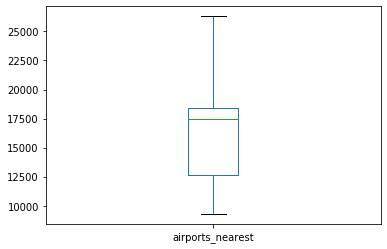

In [61]:
df.query('locality_name == "поселок Шушары"')['airports_nearest'].plot(kind='box')

----------

## <span style="color:orange">Комментарий от наставника</span>

Здесь у меня код падает с ошибкой.

---------
#### Все проблемы из-за буквы ё. Исправил

### Посмотрим, в какой доле населенных пунктов, мы сможем заменить таким образом расстояние до аэропорта airports_nearest

In [62]:
df.groupby('locality_name')\
    .agg({'airports_nearest':'median'})\
    .reset_index()\
    .rename(columns={'airports_nearest':'median_value_from_airport'})\
    .median_value_from_airport.notna().sum()/df.locality_name.nunique()

0.07854984894259819

### Всего лишь в 8% мест возможно рассчитать медиану по  airports_nearest и заменить NaN в группе.
### Т.к. для дальнейшего анализа расстояние до аэропорта нам не понадобиться, не будем заменять пропущенные значения.

### Оставляем NaN

----------

## <span style="color:red">Комментарий от наставника</span>

Может в таком случае оставить это поле с пропусками? Насколько я вижу цель - у нас нет цели анализировать расстояние до аэропорта - поэтому такая замена нам не понадобится. Не слишком увлекайся заменами пропусков, если для нашего проекта в этом нет необходимости.

---------
#### Ок, понял

----

## Замена NaN в cityCenters_nearest

### Опять только в 7,39% групп есть данные, по которым мы можем более менее точно рассчитать медианное значения для замены

In [63]:
df.groupby('locality_name')\
    .agg({'cityCenters_nearest':'median'})\
    .reset_index()\
    .rename(columns={'cityCenters_nearest':'median_value_from_center'})\
    .median_value_from_center.notna().sum()/df.locality_name.nunique()

0.07854984894259819

## Оставим пропущенные значения

----------

## <span style="color:red">Комментарий от наставника</span>

Слишком большое значение - я бы сейчас не заострял внимание на замене этих пропусков.

---------
#### Ок, исправил

In [73]:
# От наставника
df[df['cityCenters_nearest']<9999999]['cityCenters_nearest'].max()

65968.0

----

## Замена NaN в parks_nearest

In [64]:
# Замена медианой по населенному пункту возможно только в 3,5% населенных пунктов - очень мало.
df.groupby('locality_name')\
    .agg({'parks_nearest':'median'})\
    .reset_index()\
    .rename(columns={'parks_nearest':'median_value'})\
    .median_value.notna().sum()/df.locality_name.nunique()

0.03927492447129909

### Ближайшие парки зависят от гео расположения, тк у нас нет гео точек, то замена медианой в больших населенных пунктах не даст точного результата.

## Оставим пропущенные значения

-----

## Замена NaN в ponds_nearest

### Ближайшие пруды зависят от гео расположения, тк у нас нет гео точек, то замена медианой в больших населенных пунктах не даст точного результата.

### Тем не менее, проверим в скольки населенных пунктах мы можем заменить nan

In [65]:
#Только в 5% мест, оставляем NaN
df.groupby('locality_name')\
    .agg({'ponds_nearest':'median'})\
    .reset_index()\
    .rename(columns={'ponds_nearest':'median_value'})\
    .median_value.notna().sum()/df.locality_name.nunique()

0.05740181268882175

----------

## <span style="color:red">Комментарий от наставника</span>

Обрати внимание, что обычно пруды (и не только пруды) есть рядом, но никак не настолько далеко, как ты предполагаешь 99999999 

---------
#### Ок, убрал число индикатор пропущенного значения

In [76]:
df['ponds_nearest'].median()

503.0

----

## Замена NaN в
## parks_around3000, ponds_around300
* Т.к. даны дискретные значения (количество объектов), заменять NaN будем модой, группируя по названию места.
* Если внутри одного населенного пункта пропущены все значения, заменим их на 0

## Замена NaN в parks_around3000

In [66]:
df['parks_around3000'] = df.groupby('locality_name')['parks_around3000']\
    .transform(lambda x: x.fillna(x.mode()))

In [67]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)

In [68]:
df['parks_around3000'].isna().sum()

0

In [69]:
df['parks_around3000'].value_counts()

0.0    15577
1.0     5658
2.0     1739
3.0      645
Name: parks_around3000, dtype: int64

### Меняем тип с float64 на int16, тк данные целочисленные и float избыточен

In [70]:
df['parks_around3000'] = df['parks_around3000'].astype('int16')

----

## Замена NaN в ponds_around3000

In [71]:
df['ponds_around3000'] = df.groupby('locality_name')['ponds_around3000']\
    .transform(lambda x: x.fillna(x.mode()))

In [72]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)

In [73]:
df['ponds_around3000'].isna().sum()

0

### Меняем тип с float64 на int16, тк данные целочисленные и float избыточен

In [74]:
df['ponds_around3000'] = df['ponds_around3000'].astype('int16')

----

## Замена NaN в days_exposition
* days_exposition - кол-во дней прошедших до снятия объекта с продажи
### Есть два варианта заполнения пропущенных значений для этой фичи:
1. Если мы принимаем что все объекты были сняты с продажи(проданы/или нет), то можно заполнить это дельтой между временем публикации и и сегодняшним числом
2. Если мы принимаем, что объекты в которых NaN не были сняты с продажи, то заполняем числом-индикатором, которое означает что объект в конечном итоге не был продан (снят с публикации)

### Заполним пропущенные значения числом индикатором -1

----------

## <span style="color:orange">Комментарий от наставника</span>

Может незаполненный столбец означает, что объявление до сих пор размещено? Какие еще варианты? Почему сразу -1?

---------
#### Если объявление еще размещено, предполагаю, что не стоит брать этот объект для анализа времени экспозиции, тк мы не знаем сколько в конечном счете пройдет времени до его снятия. Другой вариант это считать пройденное количество дней с момента публикации по сегодняшний день, но думаю что это неправильно. Тк в задании есть пояснение: 
* "days_exposition — сколько дней было размещено объявление __(от публикации до снятия)__"

## Рассмотрел другие варианты:

* Если мы принимаем что все объекты были сняты с продажи(проданы/или нет), то можно заполнить это дельтой между временем публикации и и сегодняшним числом
* Если мы принимаем, что объекты в которых NaN все еще размещены, то заполняем числом-индикатором, которое означает что объект в конечном итоге не был продан/снят_с_продажи на момент выгрузки датасета.

In [92]:
df.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,type_place
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.0,8,0,False,108.0,False,25.00,1,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,СПб
1,Серия неизвестна,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.6,1,0,False,40.4,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,Поселок
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,3.10,5,34.3,4,0,False,56.0,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,СПб
3,Серия неизвестна,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,45.0,9,0,False,159.0,False,9.31,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,СПб
4,Серия неизвестна,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.0,13,0,False,100.0,False,41.00,1,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,СПб


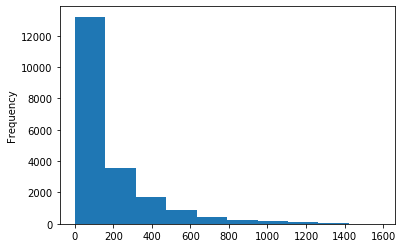

In [87]:
# Код наставника
df['days_exposition'].plot.hist()

In [75]:
df['days_exposition'] = df['days_exposition'].fillna(-1)

In [99]:
#альтернативный вариант заполнения nan: (сегодняшняя дата - дата экспозиции) в днях

----
----
----

# Посчитайте и добавьте в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж, на котором расположена квартира; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

----

### Добавим цену квадратного метра. 
* Для этого разделим цену на общую площадь объекта

In [76]:
df['m2_cost'] = df['last_price']/df['total_area'] 

### Добавим день недели, месяц и год публикации объявления
* Переведем дату и время в формат datetime
* Добавим timedelta чтобы перевести время в корректный часовой пояс

In [77]:
df['date_time'] = pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

### Т.к. точное время не используется в датасете, нет необходимости переводить в часовой пояс МСК

----------

## <span style="color:red">Комментарий от наставника</span>

А зачем ты делаешь это действие?

---------
#### *Поправил

### Добавим день недели, месяц и год публикации объявления

In [78]:
df['week_day'] = df['date_time'].dt.weekday
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

### Добавим этаж, на котором расположена квартира; варианты — первый, последний, другой

In [79]:
#можно сделать apply, можно двумя np.where, сделал apply:
df['type_floor'] = df.apply(
                lambda x: 'первый' if x.floor == 1
                     else 'последний' if x.floor == x.floors_total
                     else 'другой', axis=1)

In [80]:
df['type_floor'].value_counts()

другой       17369
последний     3336
первый        2914
Name: type_floor, dtype: int64

### Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [82]:
df['live_total_ratio'] = df['living_area']/df['total_area']

In [83]:
df['kitchen_total_ratio'] = df['kitchen_area']/df['total_area']

-----

## Выводы по первой части

## Поясните:
### __Какие пропущенные значения обнаружены;__
### __В каких столбцах потребовалось изменить тип данных и почему;__
### __По какому принципу заполнены пропуски.__
*
*

* __building_series_id__
* * Были обнаружены пропущенные значения, нельзя восстановить, заменил на "Серия неизвестна"

* __ceiling_height__
* * Были обнаружены пропущенные значения, восстанавливал заменой на медианное значение по серии дома, исходя из того что в одном типе дома нет разных потолков. 
* __floors_total__
* * По известным сериям взял максимальное значение в серии, по неизвестным сериям нельзя восстановить значение. Дропнул 80 объектов.
* __living_area__
* * Медианное значение по комнатности квартир и серии
* __is_apartment__
* * Исходя из пояснения, что неуказанные значения на самом деле равны False
* __kitchen_area__
* * Медианное значение по комнатности квартир и серии
* __balcony__
* * Замена модой внутри группы по серии и кол-ву комнат, тк значение категориальное
* __locality_name__
* * Не подлежит восстановлению, заменил на "Локация неизвестна"
* __airports_nearest__
* * Заменил на медианное значение расстояния по известным данным в той же локации
* __cityCenters_nearest__  
* * Заменил на медианное значение расстояния по известным данным в той же локации
* __parks_around3000__
* * Тк данные категориальные, заменил на моду по известным данным в той же локации
* __parks_nearest__   
* * Заменил на медианное значение расстояния по известным данным в той же локации
* __ponds_around3000__
* * Тк данные категориальные, заменил на моду по известным данным в той же локации
* __ponds_nearest__
* * Заменил на медианное значение расстояния по известным данным в той же локации
* __days_exposition__
* * Заменил на число индикатор
### В чём возможные причины возникновения пропусков;
* Пропуски могут возникать по разным причинам
1. из-за неправильного заполнения известных данных (NaN вместо 0)
2. когда данные неизвестны
3. когда в данных есть ошибки

----------

## <span style="color:red">Комментарий от наставника</span>

Всё хорошо, но я бы больше сосредочился на последовательных выводах по причине возникновения пропусков. Также не заострял бы внимание на поиске пропусков и замене их, если далее ты данные не будешь использовать. Молодец.

---------

----
-----
-----



# Задание_2. Шаг 1

### Шаг 1. Проведите исследовательский анализ данных и ответьте на вопросы:

* Каковы типичные параметры продаваемых квартир (например, площадь, цена)? 
* Укажите наиболее важные характеристики и постройте графики.
* Сколько обычно длится процесс продажи?
 
#### Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

#### Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите:
    1. зависит ли цена квадратного метра от числа комнат
    2. этажа (первого или последнего)
    3. удалённости от центра
    4. даты размещения: дня недели, месяца и года.
    
#### Что можно сказать о цене квадратного метра в пригородах?
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

#### Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. 
* Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

#### Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. 
* Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.


-----

## Для очистки от выбросов и построения графиков boxplot напишем функцию

In [93]:
def delete_outliers(df, column,graphic=0,x=8,y=8):
    # Посчитаем первый и третий квантиль
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    # Посчитаем межквартильный размах
    iqr = q3 - q1
    # Отфильтруем по условию
    filter = (df[column] >= (q1 - 1.5*iqr)) & (df[column] <= (q3 + 1.5*iqr))
    if graphic == 1:
        return df.loc[filter].boxplot([column], figsize=(x,y))
    else:
        return df.loc[filter] 

## Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

### Построим box-plot для total_area

(0, 200)

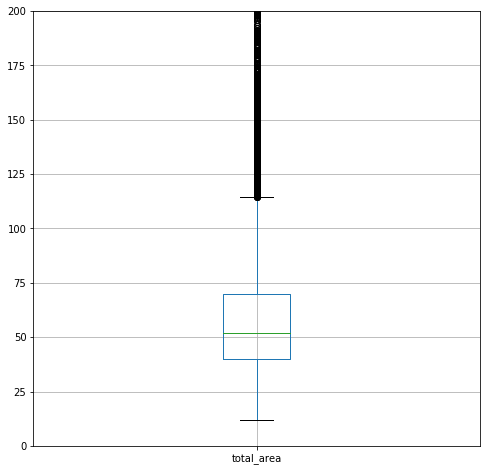

In [101]:
plot = df.boxplot(['total_area'], figsize=(8,8))
plot.set_ylim(0,200)

In [114]:
# Посчитаем медианную площадь после удаления выбросов
delete_outliers(df,'total_area',0)['total_area'].median()

50.1

(0, 120)

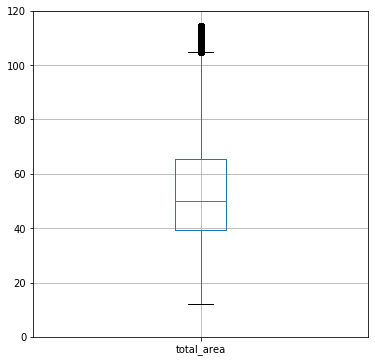

In [97]:
#Построим график
#после удаления выбросов (выходящих за концы усов боксплота)
delete_outliers(df,'total_area',1,6,6).set_ylim(0,120)

### Типичная площадь квартиры 50,1 м2

----------

## <span style="color:orange">Комментарий от наставника</span>

Здесь и в дальнейшем я бы всё же использовал интерквартильный размах между 25 и 75 персентилем

---------
#### Внес правки

### Box-plot для m2_cost

(0, 300000)

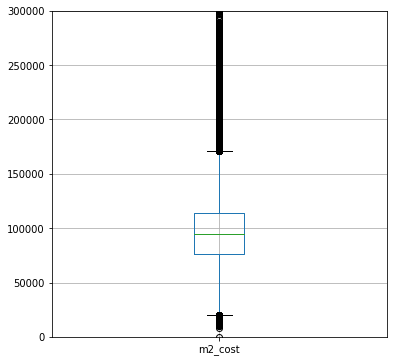

In [102]:
# исходный датафрейм
plot = df.boxplot(['m2_cost'], figsize=(6,6))
plot.set_ylim(0,300000)

(15000, 200000)

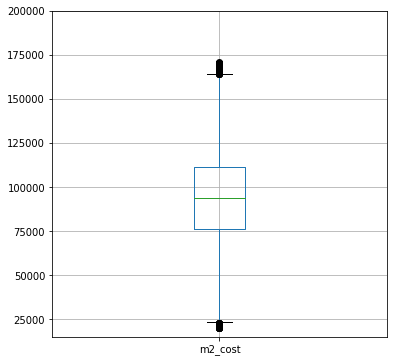

In [98]:
#После удаления выбросов
delete_outliers(df,'m2_cost',1,6,6).set_ylim(15000,200000)

In [115]:
# Найдем медианную цену за квадратный метр после удаления выбросов
delete_outliers(df,'m2_cost',0)['m2_cost'].median()

93902.43902439025

### Типичная стоимость квадратного метра 93902 р

### Box-plot для last_price

(0, 13000000)

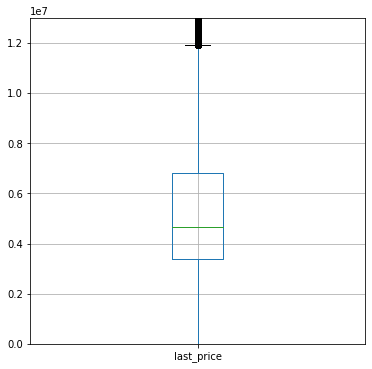

In [101]:
plot = df.boxplot(['last_price'], figsize=(6,6))
plot.set_ylim(0,13000000)

(2000000, 10000000)

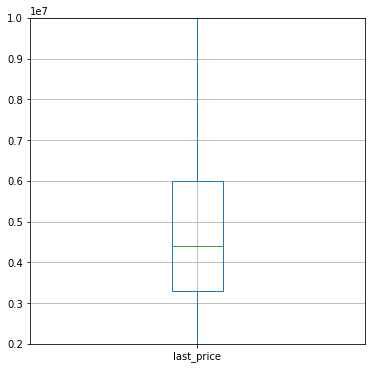

In [116]:
#Box-plot после удаления выбросов
delete_outliers(df,'last_price',1,6,6).set_ylim(2000000,10000000)

In [118]:
delete_outliers(df,'last_price',0)['last_price'].median()

4400000.0

### Типичная квартира стоит 4,4 млн р по всему датасету

------

### Создадим новый датафрейм, в котором уберем все квартиры со слишкой высокой ценой, слишком большой площадью и стоимостью квадратного метра. Для отсечения будем использовать 1,5 IQR (используем функцию delete_outliers вверху и проход в цикле по нужным фичам)

In [120]:
df_typical = delete_outliers(df,'m2_cost',0)
for feature in ['last_price','total_area']:
    df_typical = delete_outliers(df_typical,feature,0)

------

## Что можно сказать о цене квадратного метра в пригородах?

### Посмотрим на общую картину, разделив на группы - пригород и не пригород

In [122]:
list_for_filter = ['СПб','Город','Локация неизвестна']
df['prigorod'] = np.where(df['type_place'].isin(list_for_filter), 0, 1)

In [123]:
df.groupby('prigorod').agg({'m2_cost':'median'})

,m2_cost
prigorod,
0,99019.607843
1,70849.737533


(0, 200000)

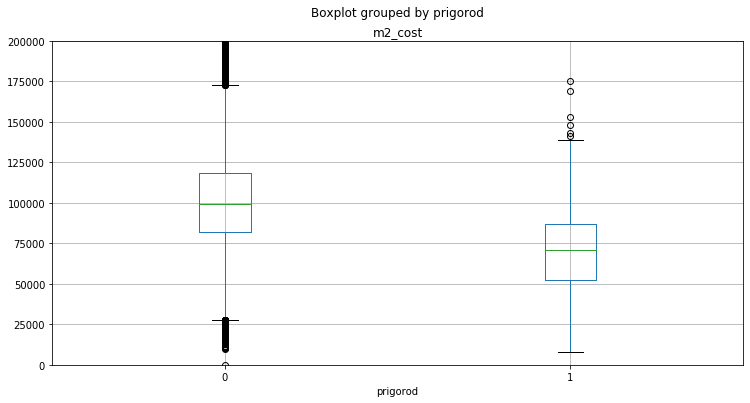

In [124]:
#графики для исходного датафрейма
plot = df.boxplot('m2_cost', by='prigorod', figsize=(12,6))
plot.set_ylim(0,200000)

### Сравним с данными в отфильтрованном датафрейме с типичными квартирами

In [125]:
df_typical['prigorod'] = np.where(df_typical.type_place.isin(list_for_filter), 0, 1)

(0, 200000)

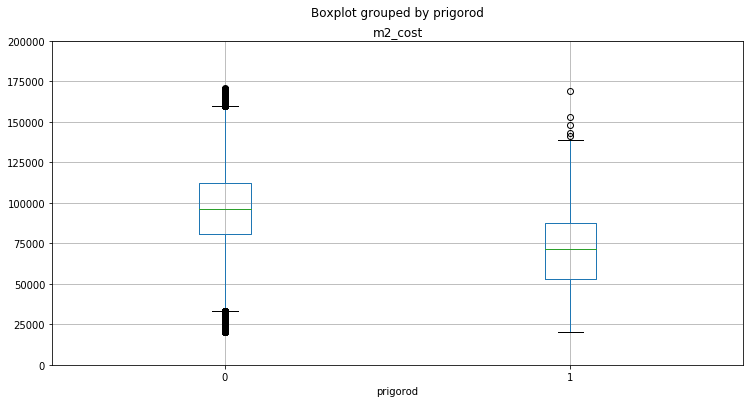

In [126]:
#графики для "типичных" квартир
plot = df_typical.boxplot('m2_cost', by='prigorod', figsize=(12,6))
plot.set_ylim(0,200000)

#### На втором графике с боксплотами еще присутствуют выбросы и их больше в пригороде. Это объясняется тем, что мы проводили отсечение для всего датафрейма, но то что не являлось выбросами в городе, может ими быть в пригороде.

### Удалим выбросы отдельно для пригорода и отдельно для города

(0, 180000)

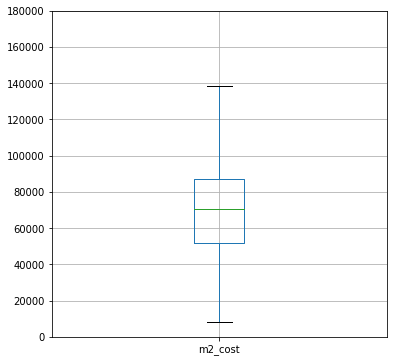

In [137]:
# очистим от выбросов в м2_cost не в пригороде
df_prigorod = delete_outliers(df[df.prigorod==1],'m2_cost',1,6,6)
df_prigorod.set_ylim(0,180000)

(15000, 200000)

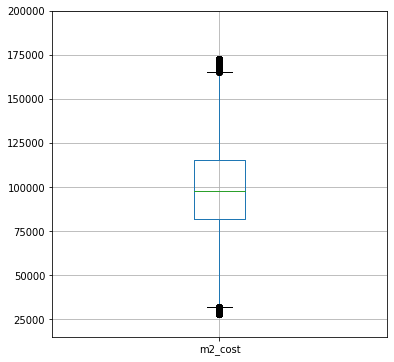

In [133]:
# очистим от выбросов в м2_cost не в пригороде
df_ne_prigorod = delete_outliers(df[df.prigorod==0],'m2_cost',0)
df_ne_prigorod.set_ylim(15000,200000)

In [139]:
#Получим медианные цены м2 для пригорода и не пригорода после удаления выбросов
print(delete_outliers(df[df.prigorod==1],'m2_cost',0)['m2_cost'].median(),
        delete_outliers(df[df.prigorod==0],'m2_cost',0)['m2_cost'].median())

70796.46017699115 97909.38228438229


## Вывод: в пригороде медиана цены квадратного метра меньше, меньше разброс значений. Намного меньше выбросов по стоимости квадратного метра(в исходном df)

* По сравнению с группой в которую входят города, СПб и неизвестная локация (не пригород)

------

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'

In [140]:
df_top10_places = df.groupby('locality_name')\
    .agg({'prigorod':'count','m2_cost':'median'})\
    .rename(columns={'prigorod':'count_objects','m2_cost':'m2_cost_median'})
df_top10_places = df_top10_places.sort_values('count_objects', ascending=False).head(10)

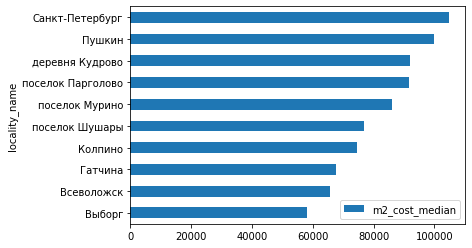

In [141]:
df_top10_places.sort_values('m2_cost_median', ascending=True)\
    .drop('count_objects', axis=1).plot(kind='barh')

In [142]:
top_10_places_list = df_top10_places.reset_index().locality_name.to_list()

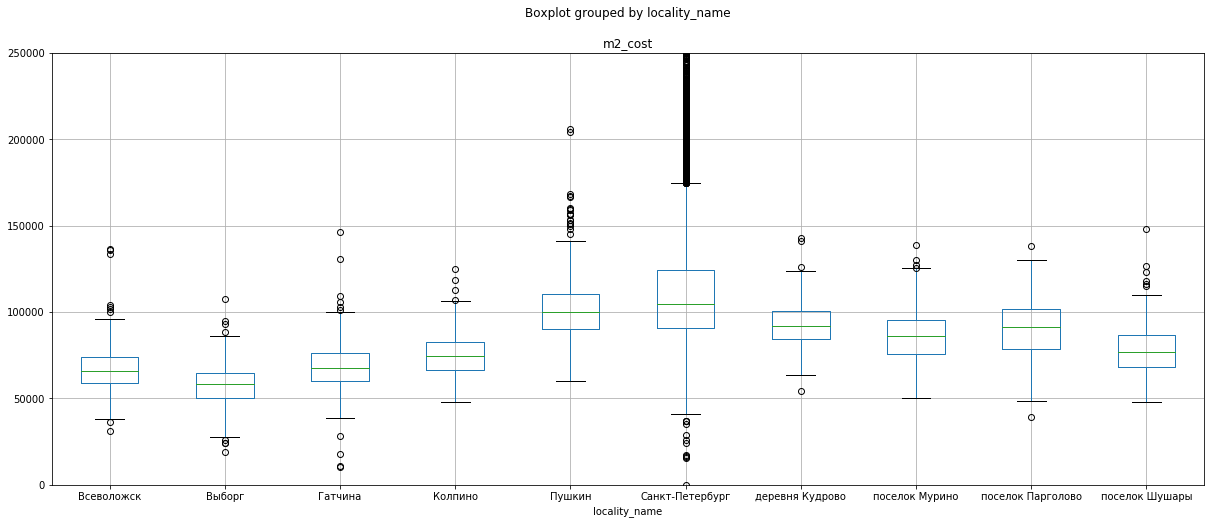

In [143]:
plot = df[df.locality_name.isin(top_10_places_list)]\
    .boxplot('m2_cost', by='locality_name',figsize=(20,8))\
    .set_ylim(0,250000)

In [165]:
df[df['locality_name'].isin(top_10_places_list)].groupby('locality_name').agg({'m2_cost':'median'})

,m2_cost
locality_name,
Всеволожск,65789.473684
Выборг,58158.319871
Гатчина,67796.610169
Колпино,74723.748474
Пушкин,100000.000000
Санкт-Петербург,104794.199480
деревня Кудрово,91860.465116
поселок Мурино,86059.293995
поселок Парголово,91642.857143


### Дальше есть два пути убрать выбросы:
1. либо использовать датафрейм с типичными квартирами где убраны выбросы в цене за м2 без деления на локации
2. разделить на локации и по каждой локации убрать выбросы в колонке m2_cost. Исправляю на второй способ (был первый изначально)

In [159]:
#Берем первый элемент из топ_10 списка гео
first_geo = top_10_places_list[0]
#Записываем в датафрейм, отправляем в функцию очищаем выбросы по m2_cost и возвращаем
#Дальше проделываем все тоже самое для остальных гео (фильтруем, очищаем от выбросов в m2_cost по каждому гео и добавляем
# в результирующий датафрейм)
df_without_outliers_in_loc = delete_outliers((df[df['locality_name'] == first_geo]),'m2_cost',0)
for geo in top_10_places_list[1:]:
    df_without_outliers_in_loc = df_without_outliers_in_loc\
        .append(delete_outliers((df[df['locality_name'] == geo]),'m2_cost',0))

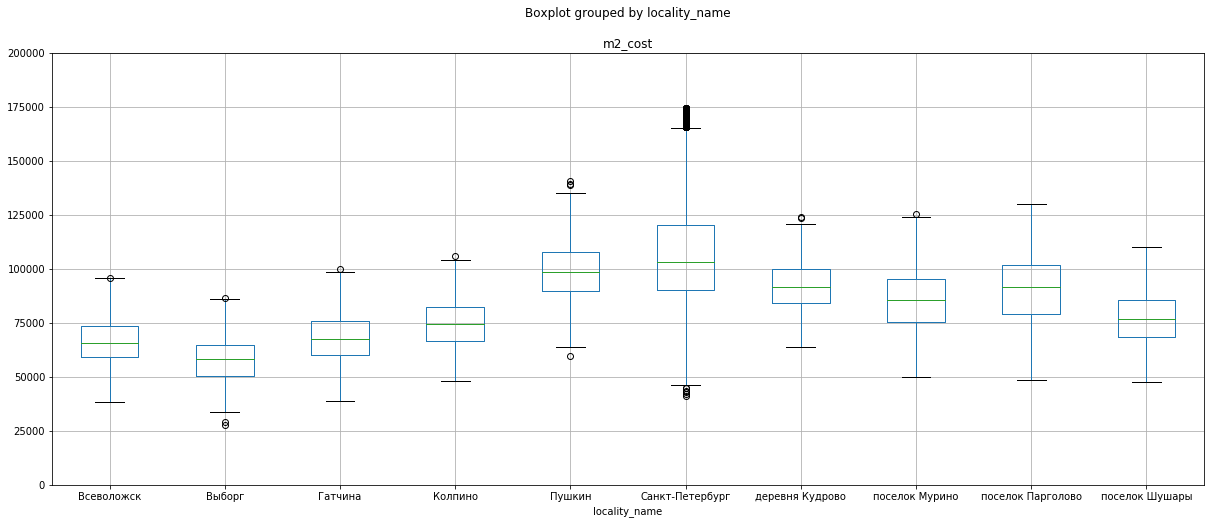

In [160]:
#Строим боксплоты по чистому датафрейму (удалены выбросы в m2_cost в каждом гео)
#Сравниваем медианные m2_costb
plot = df_without_outliers_in_loc\
    .boxplot('m2_cost',by='locality_name', figsize=(20,8))\
    .set_ylim(0,200000)

In [161]:
df_without_outliers_in_loc.groupby('locality_name').agg({'m2_cost':'median'})   

,m2_cost
locality_name,
Всеволожск,65667.564736
Выборг,58158.319871
Гатчина,67695.961995
Колпино,74562.809676
Пушкин,98493.150685
Санкт-Петербург,103125.000000
деревня Кудрово,91803.278689
поселок Мурино,85714.285714
поселок Парголово,91642.857143



## Вывод: самая большая цена квадратного метра в СПб, самая дешевая в Выборге. В СПб и Пушкине самый сильный разброс по стоимости квадратного метра - много дорогих объектов.

-----

## Зависит ли цена квадратного метра от числа комнат

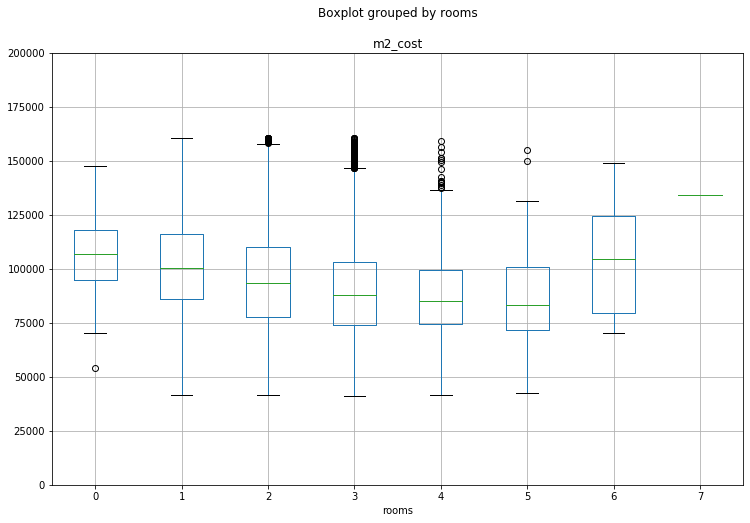

In [126]:
plot = df_typical\
    .boxplot('m2_cost', by='rooms',figsize=(12,8))\
    .set_ylim(0,200000)

In [166]:
#df с очищенным выбросами
df_typical.groupby('rooms').agg({'m2_cost':'median'})

,m2_cost
rooms,
0,105042.016807
1,100000.000000
2,91277.890467
3,84615.384615
4,80581.241744
5,72678.275290
6,71183.787054


## Вывод: С увеличением числа комнат, медианная стоимость квадратного метра начинает падать, однако для нестандартных квартир, 6 и более комант, она снова начинает расти. У студий цена квадратного метра выше, чем у [1;6] квартир

-----

------

## Зависит ли цена квадратного метра от этажа (первого или последнего)

In [168]:
df_typical['numeric_type_floor'] = df_typical.type_floor.apply(lambda x: 0 if x =='первый' 
                                                               else 1 if x == 'последний' else 2)

(30000, 200000)

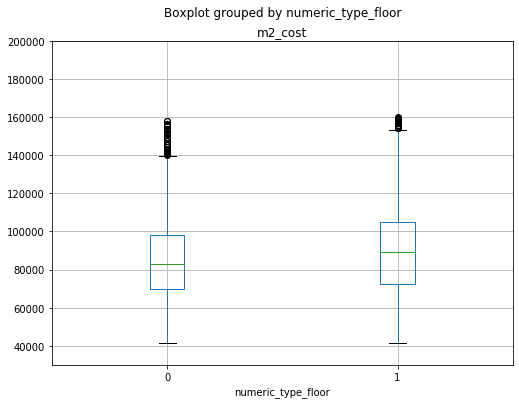

In [128]:
df_typical[df_typical.numeric_type_floor != 2]\
    .boxplot('m2_cost', by='numeric_type_floor',figsize=(8,6))\
    .set_ylim(30000,200000)

In [129]:
#датафрейм с очищенными выбросами по ВСЕМУ датафрейму в фиче m2_cost
df_typical.groupby('type_floor').agg({'m2_cost':'median'})

,m2_cost
type_floor,
другой,96907.216495
первый,83088.235294
последний,89041.095890


In [169]:
#исходный датафрейм
df.groupby('type_floor').agg({'m2_cost':'median'})

,m2_cost
type_floor,
другой,98285.542169
первый,81236.814346
последний,87777.777778


(0, 180000)

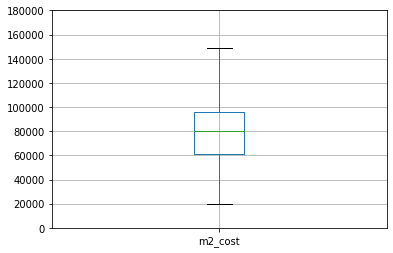

In [173]:
#удалим выбросы по каждому типу этажа в m2_cost, чтобы проверить не изменится ли медиана
first_floor = delete_outliers(df_typical[df_typical.numeric_type_floor == 0], 'm2_cost',0)
first_floor.boxplot('m2_cost').set_ylim(0,180000)

In [176]:
first_floor['m2_cost'].median()

80602.79080277949

(0, 180000)

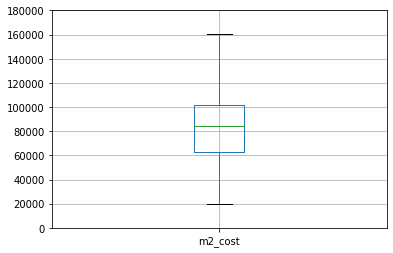

In [175]:
#последний этаж
last_floor = delete_outliers(df_typical[df_typical.numeric_type_floor == 1], 'm2_cost',0)
last_floor.boxplot('m2_cost').set_ylim(0,180000)

In [177]:
last_floor['m2_cost'].median()

84615.38461538461

## Вывод: стоимость квадратного метра зависит от этажа, обычно первый этаж дешевле последнего (за м2)

-----

-----

## Зависит ли цена квадратного метра от удаленности от центра

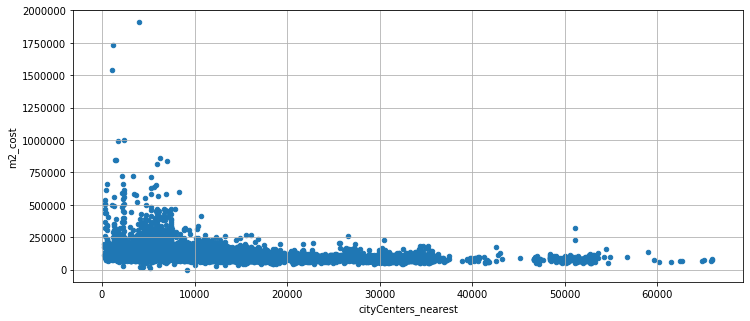

In [134]:
#Отфильтруем неизвестные значения по числу индикатору
df.query('cityCenters_nearest != 99999999')\
    .plot(x='cityCenters_nearest',y='m2_cost',kind='scatter', grid=True, figsize=(12,5))

In [135]:
#Отфильтруем неизвестные значения по числу индикатору и найдем корреляцию Пирсона
df_temp_cityCenters_nearest = df.query('cityCenters_nearest != 99999999')
df_temp_cityCenters_nearest['cityCenters_nearest'].corr(df_temp_cityCenters_nearest.m2_cost)

-0.3173709986492144

(0, 300000)

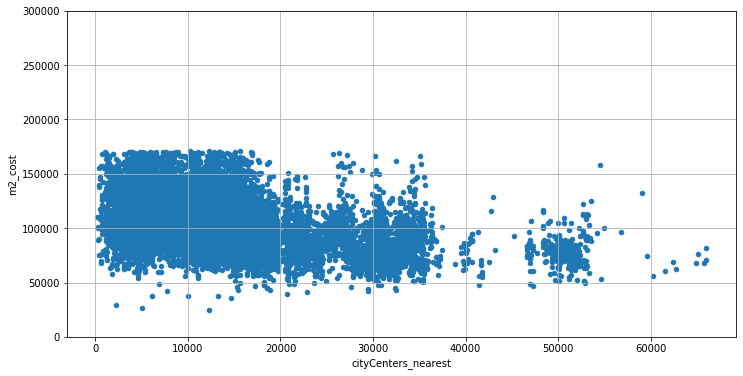

In [178]:
## Удалим выбросы выходящие за 1,5IQR по стоимости квадратного метра
delete_outliers(df, 'm2_cost',0)\
    .plot(x='cityCenters_nearest',y='m2_cost',kind='scatter', grid=True, figsize=(12,6)).set_ylim(0,300000)

## Вывод: видна зависимость между ценой за м2 и удаленностью от центра, особенно это видно в исходном датафрейме (с выбросами)

-----

-----

## Зависит ли цена квадратного метра от даты размещения: дня недели, месяца и года.

### Визуализируем зависимость между ценой квадратного метра и днем недели

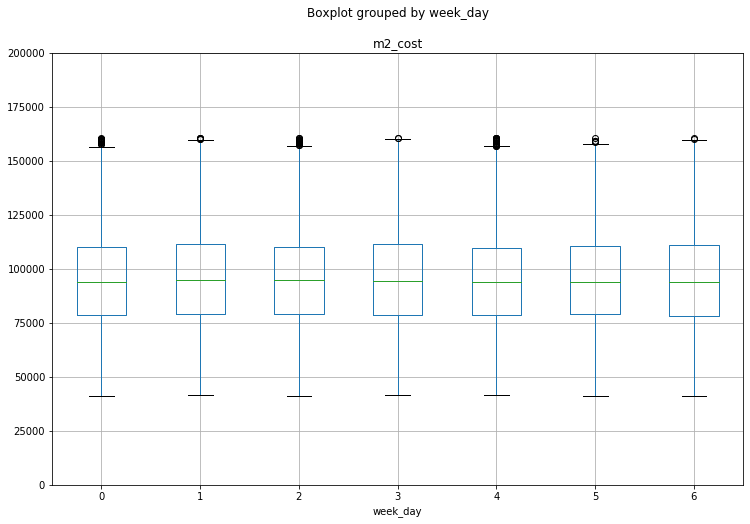

In [138]:
# По очищенному датафрейму
plot = df_typical\
    .boxplot('m2_cost', by='week_day',figsize=(12,8))\
    .set_ylim(0,200000)

In [139]:
#Корреляции нет, очень низкая
df.week_day.corr(df.m2_cost)

-0.007359589107371322

----------

## <span style="color:orange">Комментарий от наставника</span>

Обрати внимание, что для оценки зависимости переменных ты можешь использовать матрицу корреляции каждого столбца с каждым - пример ниже.

---------
#### Использую это в финальном выводе

In [140]:
df.corr().style.background_gradient('coolwarm')

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,area,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,m2_cost,week_day,month,year,live_total_ratio,kitchen_total_ratio,prigorod
total_images,1,0.104979,0.116443,0.0993952,0.0527446,0.0105938,0.106846,0.0336859,0.0104177,-0.0281193,0.116443,-0.024608,0.107164,0.0854157,-0.00280026,-0.0479096,0.0373913,-0.00615091,0.0120146,-0.00410198,-0.0558857,0.133411,-0.00925405,0.00465003,0.139006,-0.00189504,-0.0463075,-0.0573048
last_price,0.104979,1,0.653605,0.363138,0.290044,-0.00679735,0.55602,0.0267781,0.0269697,-0.0250888,0.653605,-0.00880559,0.441119,0.0157391,-0.0260629,-0.20625,0.198386,-0.0166219,0.209062,-0.0855346,0.053317,0.736754,0.00123714,0.00271913,-0.0429088,-0.0363913,-0.120501,-0.124429
total_area,0.116443,0.653605,1,0.75825,0.397601,-0.0755443,0.909571,-0.0247816,0.0296959,-0.0719847,1,-0.0349437,0.571149,0.02321,-0.0300546,-0.230937,0.201367,-0.021386,0.201056,-0.0996175,0.0969354,0.302464,-0.00576446,0.00488869,-0.0793673,0.0754311,-0.370019,-0.127792
rooms,0.0993952,0.363138,0.75825,1,0.25172,-0.227702,0.852696,-0.151009,0.000371588,-0.145948,0.75825,-0.0876669,0.2566,0.0137412,-0.0608911,-0.184785,0.158225,-0.0540424,0.121741,-0.0591739,0.0792669,0.0558213,-0.00510273,-0.00424612,-0.0550229,0.45709,-0.614569,-0.131885
ceiling_height,0.0527446,0.290044,0.397601,0.25172,1,-0.0894813,0.377968,-0.0489276,0.0662676,0.00529576,0.397601,-0.00235015,0.331222,-0.0466965,-0.0851354,-0.307304,0.252834,-0.0614459,0.225007,-0.11312,0.0763512,0.291012,-0.0209971,-0.0045951,-0.0542297,-0.0240134,-0.0201555,-0.10498
floors_total,0.0105938,-0.00679735,-0.0755443,-0.227702,-0.0894813,1,-0.170739,0.677888,-0.026361,0.0700657,-0.0755443,0.0507312,0.152521,0.141189,0.108526,0.0197526,-0.158894,0.0975829,-0.0486193,0.0387679,-0.0254773,0.148388,0.0130703,0.0166808,0.00799658,-0.350193,0.338055,0.0709614
living_area,0.106846,0.55602,0.909571,0.852696,0.377968,-0.170739,1,-0.0983987,0.0280144,-0.0558887,0.909571,-0.0316148,0.406908,0.00608665,-0.05708,-0.226212,0.209348,-0.0539161,0.17933,-0.0830641,0.0911391,0.212777,-0.00704831,-0.000591751,-0.073179,0.399075,-0.496621,-0.134085
floor,0.0336859,0.0267781,-0.0247816,-0.151009,-0.0489276,0.677888,-0.0983987,1,-0.0132134,0.035865,-0.0247816,0.0361049,0.126797,0.129503,0.0728436,0.00900292,-0.105217,0.07295,-0.0296182,0.0247312,-0.0211108,0.129346,0.0115919,0.0203465,0.00560421,-0.254451,0.233962,0.0584145
is_apartment,0.0104177,0.0269697,0.0296959,0.000371588,0.0662676,-0.026361,0.0280144,-0.0132134,1,-0.00363251,0.0296959,-0.00245662,0.0389968,0.0338294,0.0165208,0.00377204,0.0216176,-0.0335427,0.024453,0.00331673,0.00859929,0.0447708,-0.00947711,0.00237153,0.00938583,0.00102773,0.0102744,-0.0145269
studio,-0.0281193,-0.0250888,-0.0719847,-0.145948,0.00529576,0.0700657,-0.0558887,0.035865,-0.00363251,1,-0.0719847,-0.00420645,-0.0140237,0.0240621,-0.0216493,-0.00679271,-0.0320716,0.00692301,-0.0092925,0.00185867,-0.0170796,0.0155197,-0.000883305,-0.000683676,0.0110409,0.0848742,0.175303,0.0277762


## Вывод: цена квадратного метра не зависит от дня публикации объявления

----

----

## Визуализируем зависимость между ценой квадратного метра и номером месяца

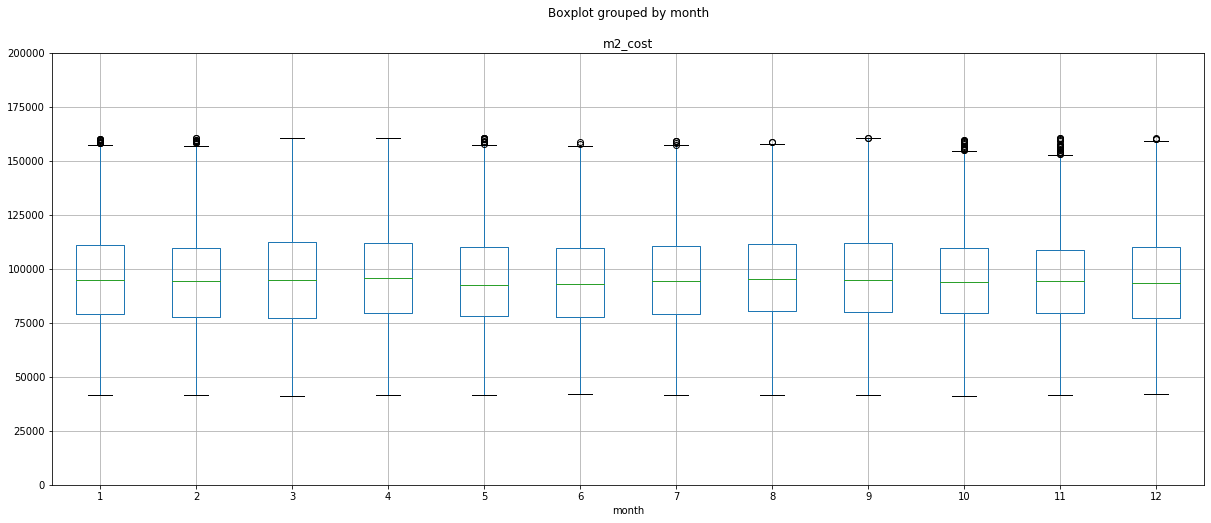

In [142]:
# По очищенному датафрейму
plot = df_typical\
    .boxplot('m2_cost', by='month',figsize=(20,8))\
    .set_ylim(0,200000)

In [143]:
#Корреляции нет, очень низкая
df.month.corr(df.m2_cost)

-0.0019834924869416124

----------

## <span style="color:orange">Комментарий от наставника</span>

Уже в который раз обращаю внимание - у тебя сначала комментарий с выводом, потом код, после выполнения которого ты этот вывод должен был сделать. Как такое может быть? :)

---------
#### Еще раз все проверил, поправил пару моментов, но вроде все ок

## Вывод: цена квадратного метра не зависит от месяца публикации

----

----

## Визуализируем зависимость между ценой квадратного метра и годом

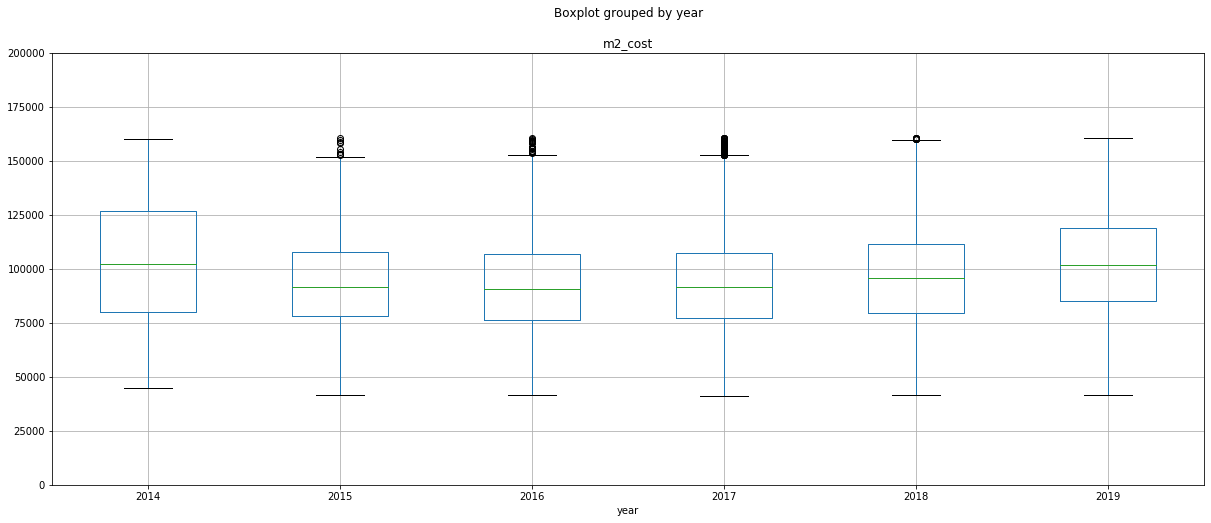

In [145]:
# По очищенному датафрейму
plot = df_typical\
    .boxplot('m2_cost', by='year',figsize=(20,8))\
    .set_ylim(0,200000)

----------

## <span style="color:orange">Комментарий от наставника</span>

Чтобы посмотреть зависимость числовой переменной и категориальной - в нашем случае год, __boxplot__ с разбиением по категориям (годам) - идеальный график, точечная диаграмма не нужна. Когда категорий много и или мы сравниваем две числовые переменные с большим кол-вом значений, идеально подойдет точечная диаграмма. Не надо шлёпать эти графики подряд :)

---------
#### Ок, понял

## Вывод: в 2014 году медиана цены за квадратный м2 была выше , чем в 2015-2018. Начиная с 2018 стоимость м2 начала увеличиваться.

----

----

## Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра.

* Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений.

* Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

### За центр будем принимать удаленность от 0 до 5000 метров, посмотрим сколько объектов в этой группе

In [146]:
len(df.query('cityCenters_nearest <5000'))

2075

### Создадим датафрейм с типичными квартирами в центре, удалим все что выходит за 1,5IQR для числа комнат и площади. За центр возьмем фильтр в 5000метров

In [179]:
# Уберем вбросы по комнатам
df_typical_center = delete_outliers(df.query('cityCenters_nearest <5000'), 'rooms',0)

In [180]:
# Уберем выбросы по площади
df_typical_center = delete_outliers(df_typical_center, 'total_area',0)

### Построим матрицу корреляции внутри типичных квартир в центре (для стоимости)

In [186]:
cor_in_center = df_typical_center.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'cor_price_in_center'})
cor_in_center

,index,cor_price_in_center
0,last_price,1.000000
1,m2_cost,0.830295
2,total_area,0.458743
3,area,0.458743
4,kitchen_area,0.349781
5,living_area,0.334000
6,rooms,0.204619
7,floor,0.135694
8,total_images,0.126027
9,parks_around3000,0.106025


## Вывод: в центре на стоимость влияют: m2_cost, total_area, area, cityCenter_nearest, ponds_around3000, living_area, parks_around3000, living_area
## Особенно интересно влияние близости к центру, близость прудов и парков

-----

-----

## Создадим датафрейм для нецентральных квартир, удаленностью больше 5000м

In [150]:
len(df.query('cityCenters_nearest >5000'))

16035

In [182]:
# Создадим датафрейм для объектов вне центра, уберем выбросы по комнатам
df_out_center = delete_outliers(df.query('cityCenters_nearest >5000'), 'rooms',0)

In [183]:
# Уберем выбросы по площади
df_out_center = delete_outliers(df_out_center, 'total_area',0)

### Построим матрицу корреляции внутри типичных квартир в центре (для стоимости)

In [184]:
cor_out_center = df_out_center.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'cor_price_out_center'})
cor_out_center.style.background_gradient('coolwarm')

,index,cor_price_out_center
0,last_price,1
1,total_area,0.747283
2,area,0.747283
3,m2_cost,0.663475
4,living_area,0.57083
5,kitchen_area,0.534512
6,rooms,0.429638
7,ceiling_height,0.349405
8,total_images,0.172444
9,ponds_around3000,0.147165


### Для наглядного вывода объединим матрицы корреляций для квартир в центре и вне центра

In [187]:
cor_out_center.merge(cor_in_center)

,index,cor_price_out_center,cor_price_in_center
0,last_price,1.000000,1.000000
1,total_area,0.747283,0.458743
2,area,0.747283,0.458743
3,m2_cost,0.663475,0.830295
4,living_area,0.570830,0.334000
5,kitchen_area,0.534512,0.349781
6,rooms,0.429638,0.204619
7,ceiling_height,0.349405,0.096775
8,total_images,0.172444,0.126027
9,ponds_around3000,0.147165,0.092771


## Выводы: 
* __Для квартир не в центре__, на цену больше влияет площадь (общая, жилая), кол-во комнат, стоимость квадратного метра 
* __Для квартир в центре__, на цену влияет как стандартные факторы перечисленные для не центральных квартир, так и такие факторы как:
            1. Близость к центру
            2. Близость водоемов
            3. Близость прудов
* У жителей центра другие потребности, в отличии от обычных людей, либо оценку делают риэлторы с оглядкой на эти факторы.

-----

------

## Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки.
* Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

### Выберу основные показатели
* last_price - последняя цена
* rooms — число комнат
* total_area — площадь квартиры в квадратных метрах (м²)

## Апартаменты

In [189]:
# Формирую датафрейм для апартаментов
df_apartments = df.query('is_apartment == 1')

### Удалим для датафрейма выбросы по стоимости, числу комнат и общей площади

In [190]:
# Сформируем список для удаления выбросов в каждом датафрейме
features_for_def = ['total_area','rooms','last_price']

In [191]:
for feature in features_for_def:
    df_apartments = delete_outliers(df_apartments, feature,0)

In [192]:
### Сохраним корреляции с ценой
apartments_cor = df_apartments.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'cor_price_apartments'})

## Студии

In [193]:
# Формирую датафрейм для студий
df_studio = df.query('studio == 1')

### Удалим для датафрейма выбросы по стоимости, числу комнат и общей площади

In [194]:
for feature in features_for_def:
    df_studio = delete_outliers(df_studio, feature,0)

In [195]:
### Сохраним корреляции с ценой
studio_cor = df_studio.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'cor_price_studio'})

## Открытая планировка

In [196]:
# Формирую датафрейм для открытой планировки
df_open = df.query('open_plan == 1')

### Удалим для датафрейма выбросы по стоимости, числу комнат и общей площади

In [197]:
for feature in features_for_def:
    df_open = delete_outliers(df_open, feature)

In [198]:
### Сохраним корреляции с ценой
open_cor = df_open.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'cor_price_open'})

## Обычные квартиры

In [199]:
# Формирую датафрейм для обычных квартир
df_ordinary_flats = df.query('open_plan == 0 & studio == 0 & is_apartment == 0')

### Удалим для датафрейма выбросы по стоимости, числу комнат и общей площади

In [200]:
for feature in features_for_def:
    df_ordinary_flats = delete_outliers(df_ordinary_flats, feature,0)

In [201]:
### Сохраним корреляции с ценой
ordinary_cor = df_ordinary_flats.corr()\
        .filter(items = ['last_price'])\
        .sort_values('last_price', ascending=False)\
        .reset_index()\
        .rename(columns={'last_price':'cor_price_ordinary'})

In [202]:
#соединим все рассчитанные корреляции по всем типам объектов
final_corr = apartments_cor.merge(studio_cor)
final_corr = final_corr.merge(open_cor)
final_corr = final_corr.merge(ordinary_cor)

In [203]:
final_corr

,index,cor_price_apartments,cor_price_studio,cor_price_open,cor_price_ordinary
0,last_price,1.000000,1.000000,1.000000,1.000000
1,m2_cost,0.585123,0.889011,0.858152,0.625000
2,ponds_around3000,0.460849,0.081525,0.368903,0.281195
3,total_area,0.419009,0.391811,0.198540,0.673935
4,area,0.419009,0.391811,0.198540,0.673935
5,parks_around3000,0.359570,0.201508,0.097339,0.248547
6,living_area,0.334419,0.237972,0.449279,0.526759
7,balcony,0.312967,0.256695,0.195474,0.089426
8,month,0.275181,0.149678,-0.130137,0.002962
9,ceiling_height,0.268174,0.021148,0.127543,0.343147


## Вывод
### Корреляции отличаются, но cкорее они обусловлены тем, что квартиры расположены в разных гео. Тем не менее:
    
    1. Для студий стоимость максимально коррелирована с близостью к центру и ценой за квадратный метр
    2. Для открытой планировки максимальная корреляция с ценой за м2, близостью к центру и жилой площадью
    3. Для апартаментов максимальная корреляция с ценой за м2, близостью прудов и общей площадью
    4. Для обычных квартир максимальная корреляция цены с ценой за м2, площадью, количеством комнат и площадью кухни

----

-----

# Финальный вывод

* __Типичная площадь квартиры__ по всему датафрейму: 50,1 м2.
* __Типичная стоимость квадратного метра__ по всему датафрейму 93902 р/м2.
* __Типичная стоимость квартиры__ 4,4 млн руб. по всему датафрейму.
----
* __В пригороде__ медиана цены квадратного метра меньше, чем в городе, так же меньше разброс значений. 
------
* __Cамая большая цена квадратного метра__ в СПб, __самая дешевая цена квадратного метра__ в Выборге. 
* В СПб и Пушкине самый сильный разброс по стоимости квадратного метра - много дорогих объектов.
------
* __С увеличением числа комнат, медианная стоимость квадратного метра начинает падать__, однако для нестандартных квартир, 6 и более комнат, она снова начинает расти. У студий цена квадратного метра выше, чем у 1-6 квартир.
-----
* __Cтоимость квадратного метра зависит от этажа__, обычно первый этаж дешевле последнего.
-----
* __Есть зависимость между ценой за м2 и удаленностью от центра__, чем дальше от центра, тем дешевле квартира, однако на определенном промежутке удаленности зависимость сходит на нет.
----
* __Цена квадратного метра не зависит от дня публикации объявления.__
----
* __Цена квадратного метра не зависит от месяца публикации объявления.__
----
* __Цена квадратного метра зависит от года__ (но скорее обуславливается мультиколлинеарностью с другой неизвестной переменной, например, инфляцией/покупательской способностью). В 2014 году медиана цены за квадратный м2 была выше , чем в 2015-2018. Начиная с 2018 стоимость м2 начала увеличиваться.
----
* __В центре на стоимость квартиры влияет близость парков, водоемов и центра__,  помимо основных параметров: m2_cost, total_area, area, living_area, living_area, rooms
* __Не в центре на стоимость влияют основные параметры__: m2_cost, total_area, area, living_area, living_area, rooms

----
* __Корреляции по типам квартир (открытая планировка, студии, апартаменты, обычные квартиры)__ Корреляции отличаются, но cкорее они обусловлены тем, что квартиры расположены в разных гео. Тем не менее:
#### -
1. Для студий стоимость максимально коррелирована с близостью к центру и ценой за квадратный метр
2. Для открытой планировки максимальная корреляция с ценой за м2, близостью к центру и жилой площадью
3. Для апартаментов максимальная корреляция с ценой за м2, близостью прудов и общей площадью
4. Для обычных квартир максимальная корреляция цены с ценой за м2, площадью, количеством комнат и площадью кухни

----------

## <span style="color:orange">Комментарий от наставника</span>

Пётр, твоя работа близка к финальной версии. Попрошу тебя:
1. Пройтись по всем комментариям и внести необохдимые правки
2. Учесть рекомендации по графикам и внимательно доработать этот пункт, попробовать автоматизировать построение графиков
3. Доработать финальный вывод.

---------